# 準備

## Googleドライブのマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [3]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13333333333333333
                : 10. 正答率(テスト) = 0.1166
Generation: 20. 正答率(トレーニング) = 0.16333333333333333
                : 20. 正答率(テスト) = 0.1289
Generation: 30. 正答率(トレーニング) = 0.19666666666666666
                : 30. 正答率(テスト) = 0.1445
Generation: 40. 正答率(トレーニング) = 0.24
                : 40. 正答率(テスト) = 0.169
Generation: 50. 正答率(トレーニング) = 0.32
                : 50. 正答率(テスト) = 0.2194
Generation: 60. 正答率(トレーニング) = 0.3566666666666667
                : 60. 正答率(テスト) = 0.2612
Generation: 70. 正答率(トレーニング) = 0.37666666666666665
                : 70. 正答率(テスト) = 0.2757
Generation: 80. 正答率(トレーニング) = 0.43
                : 80. 正答率(テスト) = 0.3131
Generation: 90. 正答率(トレーニング) = 0.4766666666666667
                : 90. 正答率(テスト) = 0.3535
Generation: 100. 正答率(トレーニング) = 0.51
                : 100. 正答率(テスト) = 0.3685
Generation: 110. 正答率(トレーニング) = 0.5766666666666667
                : 110. 正答率(テスト) = 0.4155
Generation: 120. 正答率(トレーニング) = 0.6766666666666666
          

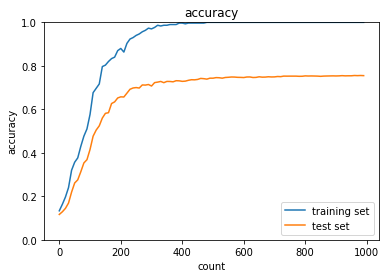

In [4]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.21
                : 10. 正答率(テスト) = 0.1561
Generation: 20. 正答率(トレーニング) = 0.3233333333333333
                : 20. 正答率(テスト) = 0.2155
Generation: 30. 正答率(トレーニング) = 0.35333333333333333
                : 30. 正答率(テスト) = 0.2521
Generation: 40. 正答率(トレーニング) = 0.39
                : 40. 正答率(テスト) = 0.278
Generation: 50. 正答率(トレーニング) = 0.43
                : 50. 正答率(テスト) = 0.3169
Generation: 60. 正答率(トレーニング) = 0.4633333333333333
                : 60. 正答率(テスト) = 0.3615
Generation: 70. 正答率(トレーニング) = 0.49
                : 70. 正答率(テスト) = 0.3962
Generation: 80. 正答率(トレーニング) = 0.5133333333333333
                : 80. 正答率(テスト) = 0.4239
Generation: 90. 正答率(トレーニング) = 0.5166666666666667
                : 90. 正答率(テスト) = 0.4457
Generation: 100. 正答率(トレーニング) = 0.56
                : 100. 正答率(テスト) = 0.4793
Generation: 110. 正答率(トレーニング) = 0.5733333333333334
                : 110. 正答率(テスト) = 0.4784
Generation: 120. 正答率(トレーニング) = 0.6366666666666667
                : 120. 正答率(

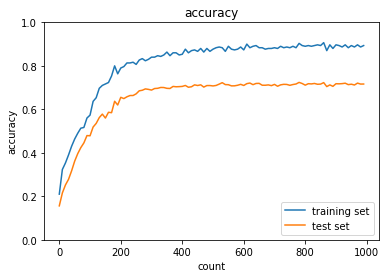

In [5]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5466666666666666
                : 10. 正答率(テスト) = 0.4133
Generation: 20. 正答率(トレーニング) = 0.5266666666666666
                : 20. 正答率(テスト) = 0.4147
Generation: 30. 正答率(トレーニング) = 0.6733333333333333
                : 30. 正答率(テスト) = 0.55
Generation: 40. 正答率(トレーニング) = 0.8566666666666667
                : 40. 正答率(テスト) = 0.6932
Generation: 50. 正答率(トレーニング) = 0.8833333333333333
                : 50. 正答率(テスト) = 0.7114
Generation: 60. 正答率(トレーニング) = 0.8833333333333333
                : 60. 正答率(テスト) = 0.7113
Generation: 70. 正答率(トレーニング) = 0.8666666666666667
                : 70. 正答率(テスト) = 0.6699
Generation: 80. 正答率(トレーニング) = 0.9133333333333333
                : 80. 正答率(テスト) = 0.74
Generation: 90. 正答率(トレーニング) = 0.7466666666666667
                : 90. 正答率(テスト) = 0.6074
Generation: 100. 正答率(トレーニング) = 0.74
                : 100. 正答率(テスト) = 0.5599
Generation: 110. 正答率(トレーニング) = 0.9333333333333333
                : 110. 正答率(テスト) = 0.7587
Generation: 120. 正答率(トレーニ

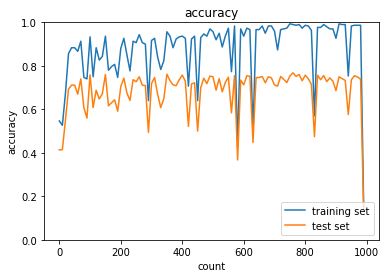

In [6]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------
weigth_decay_lambdaの値を倍にして確認する

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.6033333333333334
                : 10. 正答率(テスト) = 0.4838
Generation: 20. 正答率(トレーニング) = 0.49333333333333335
                : 20. 正答率(テスト) = 0.4198
Generation: 30. 正答率(トレーニング) = 0.5133333333333333
                : 30. 正答率(テスト) = 0.4144
Generation: 40. 正答率(トレーニング) = 0.7966666666666666
                : 40. 正答率(テスト) = 0.634
Generation: 50. 正答率(トレーニング) = 0.44666666666666666
                : 50. 正答率(テスト) = 0.3613
Generation: 60. 正答率(トレーニング) = 0.7233333333333334
                : 60. 正答率(テスト) = 0.5995
Generation: 70. 正答率(トレーニング) = 0.5966666666666667
                : 70. 正答率(テスト) = 0.4747
Generation: 80. 正答率(トレーニング) = 0.4533333333333333
                : 80. 正答率(テスト) = 0.3506
Generation: 90. 正答率(トレーニング) = 0.45666666666666667
                : 90. 正答率(テスト) = 0.3915
Generation: 100. 正答率(トレーニング) = 0.63
                : 100. 正答率(テスト) = 0.565
Generation: 110. 正答率(トレーニング) = 0.61
                : 110. 正答率(テスト) = 0.5084
Generation: 120. 正答率(トレーニング) = 0.6

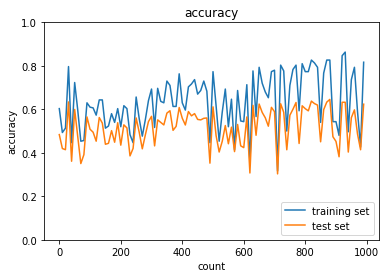

In [9]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
# weight_decay_lambda = 0.005
weight_decay_lambda = 0.01
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [10]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1072
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1158
Generation: 30. 正答率(トレーニング) = 0.16
                : 30. 正答率(テスト) = 0.1312
Generation: 40. 正答率(トレーニング) = 0.18
                : 40. 正答率(テスト) = 0.1486
Generation: 50. 正答率(トレーニング) = 0.21666666666666667
                : 50. 正答率(テスト) = 0.1736
Generation: 60. 正答率(トレーニング) = 0.25
                : 60. 正答率(テスト) = 0.1976
Generation: 70. 正答率(トレーニング) = 0.29
                : 70. 正答率(テスト) = 0.2202
Generation: 80. 正答率(トレーニング) = 0.31
                : 80. 正答率(テスト) = 0.2375
Generation: 90. 正答率(トレーニング) = 0.36333333333333334
                : 90. 正答率(テスト) = 0.2456
Generation: 100. 正答率(トレーニング) = 0.37
                : 100. 正答率(テスト) = 0.2606
Generation: 110. 正答率(トレーニング) = 0.38333333333333336
                : 110. 正答率(テスト) = 0.2751
Generation: 120. 正答率(トレーニング) = 0.41333333333333333
                : 120. 正答率(テスト) = 0.2882
Generation: 130. 正答率(トレー

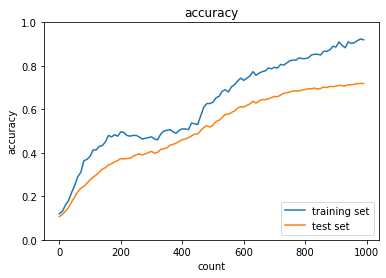

In [11]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11333333333333333
                : 10. 正答率(テスト) = 0.1104
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1175
Generation: 30. 正答率(トレーニング) = 0.15666666666666668
                : 30. 正答率(テスト) = 0.1371
Generation: 40. 正答率(トレーニング) = 0.2
                : 40. 正答率(テスト) = 0.1517
Generation: 50. 正答率(トレーニング) = 0.25666666666666665
                : 50. 正答率(テスト) = 0.1738
Generation: 60. 正答率(トレーニング) = 0.30333333333333334
                : 60. 正答率(テスト) = 0.1979
Generation: 70. 正答率(トレーニング) = 0.32
                : 70. 正答率(テスト) = 0.229
Generation: 80. 正答率(トレーニング) = 0.33666666666666667
                : 80. 正答率(テスト) = 0.2541
Generation: 90. 正答率(トレーニング) = 0.39
                : 90. 正答率(テスト) = 0.2787
Generation: 100. 正答率(トレーニング) = 0.43
                : 100. 正答率(テスト) = 0.299
Generation: 110. 正答率(トレーニング) = 0.43333333333333335
                : 110. 正答率(テスト) = 0.3158
Generation: 120. 正答率(トレーニング) = 0.4666666666666667
                : 120. 正

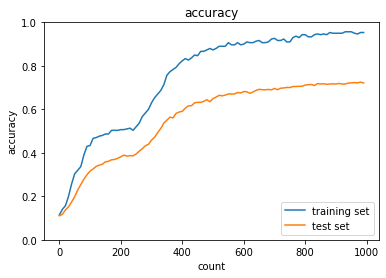

In [12]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

→drppoutにL1正則化を行うと、少しだが正答率が高くなった。